In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams['font.sans-serif']=["arial"]

from scipy.stats import ttest_ind
from scipy.stats import ttest_rel


# Make boxplots

In [2]:
def make_boxplots(datatoplot, addcolor):
    plt.figure(figsize=(2,1.9))
    meanlineprops = dict(linestyle='-', linewidth=2, color='purple')
    ax = sns.boxplot(x="Freq", y="Vector_Length", data=datatoplot, color=addcolor, linewidth=1.8, fliersize=0, showmeans=True, meanline=True, meanprops = meanlineprops)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .1))

    plt.setp(ax.artists, fill=addcolor, edgecolor=addcolor)
    plt.setp(ax.lines, color=addcolor)

    for medl in ax.lines[4::7]:
        medl.set_color('blue')
        medl.set_linewidth(2)

    sns.swarmplot(x="Freq", y="Vector_Length", data=datatoplot, color=addcolor, edgecolor=addcolor, linewidth=0.5, size=3, zorder=10)
    sns.despine()
    plt.xlabel("ES Frequency (Hz)", size=12)
    plt.ylabel("Vector Length", size=12)
    plt.ylim(0,1)
    plt.yticks([0,0.25,0.5,0.75,1.0], ["0.0","0.25","0.5","0.75","1.0"])
    plt.xlim(-0.6,3.6)
    plt.setp(ax.spines.values(), linewidth=2)
    plt.xticks(fontname = "arial", fontsize=11, weight='medium')
    plt.yticks(fontname = "arial", fontsize=11, weight='medium')
    ax.tick_params(length=5, width=2)
    plt.show()

### For mouse V1 cells

The excel sheets below are derived from the large datasets--each cell's info at control and 200 nA ES is put onto an excel spreadsheet for easier plotting organization.

In [3]:
to_plot_pyr_V1 = pd.read_excel('../tables/Pyr_V1_200_boxplot_lineplot_nums.xlsx')
to_plot_pvalb_V1 = pd.read_excel('../tables/Pvalb_V1_200_boxplot_lineplot_nums.xlsx')
to_plot_sst_V1 = pd.read_excel('../tables/SST_V1_200_boxplot_lineplot_nums.xlsx')
# mycolors=["#009b81", "#cd3449", "#fe7f11"]

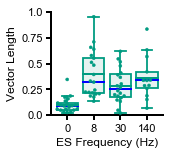

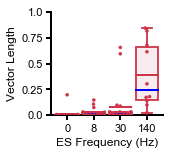

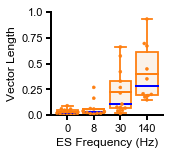

In [4]:
make_boxplots(to_plot_pyr_V1, "#009b81")
make_boxplots(to_plot_pvalb_V1, "#cd3449")
make_boxplots(to_plot_sst_V1, "#fe7f11")

### For mouse hippo cells

In [5]:
to_plot_pyr_hippo = pd.read_excel('../tables/hippo_200_boxplot_lineplot_Pyr.xlsx')
to_plot_pvalb_hippo = pd.read_excel('../tables/hippo_200_boxplot_lineplot_Pvalb.xlsx')
# mycolors=["#009b81", "#cd3449", "#fe7f11"]

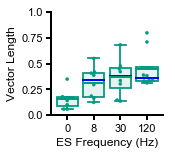

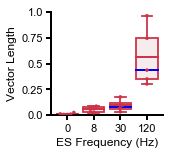

In [6]:
make_boxplots(to_plot_pyr_hippo, "#009b81")
make_boxplots(to_plot_pvalb_hippo, "#cd3449")

### For human cells

In [7]:
to_plot_human = pd.read_excel('../tables/Human_200_boxplot_lineplot_nums.xlsx')

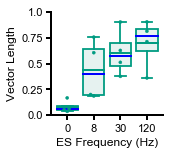

In [8]:
make_boxplots(to_plot_human, "#009b81")

# Make Lineplots

In [9]:
def make_lineplots(datatoplot, addcolor):
    ax = sns.catplot(height=2.2, aspect=1.11, kind="point", x="Freq", y="Vector_Length", data=datatoplot, hue="cell_ID", color=addcolor, legend=False,linewidth=0.1)
    plt.ylim(-0.05,1)
    #for mean-point-plot
    sns.catplot(height=2.2, aspect=1.11, kind="point", x="Freq", y="Vector_Length", data=datatoplot, ci="sd", color="black", legend=False,linewidth=0.1) #capsize=.2,     
    sns.despine()
    plt.xlabel("ES Frequency (Hz)", size=12)
    plt.ylabel("Vector Length", size=12)
    plt.ylim(-0.05,1)
    plt.yticks([0,0.25,0.5,0.75,1.0], ["0.0","0.25","0.5","0.75","1.0"])
    plt.xlim(-0.3,3.6)
    plt.xticks(fontname = "arial", fontsize=12, weight='medium')
    plt.yticks(fontname = "arial", fontsize=12, weight='medium')
    ax = plt.gca()
    ax.spines['left'].set_linewidth(2)
    ax.spines['bottom'].set_linewidth(2)
    ax.tick_params(length=5, width=2)
    plt.show()

### For mouse V1 cells

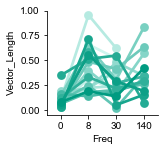

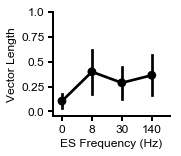

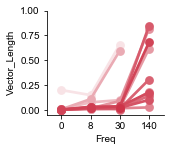

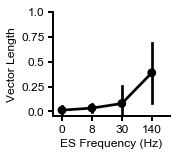

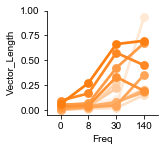

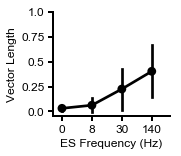

In [10]:
make_lineplots(to_plot_pyr_V1, "#009b81")
make_lineplots(to_plot_pvalb_V1, "#cd3449")
make_lineplots(to_plot_sst_V1, "#fe7f11")

### For mouse hippo cells

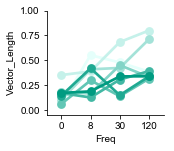

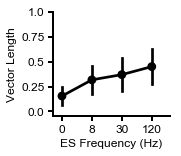

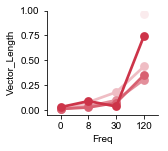

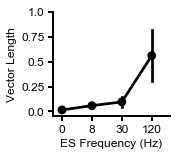

In [11]:
make_lineplots(to_plot_pyr_hippo, "#009b81")
make_lineplots(to_plot_pvalb_hippo, "#cd3449")

### For human cells

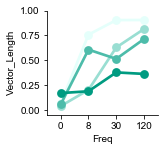

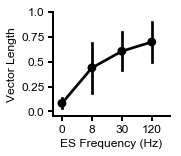

In [12]:
make_lineplots(to_plot_human, "#009b81")

# Comparison/statistics

The easiest way to do this for now is to extract and group the data (from the above spreadsheets), and do the comparisons there. (this helps 1) to check that cell_IDs are matching, for paired t-tests, and 2) to check that we have the same # of cells per comparison groups).
Note that the way pandas reads excels, it only reads the first worksheet. For organization purposes I've combined the worksheets in one excel sheet, but you need to ensure the first worksheet is the one that you will be reading.

*These are t-tests, do FDR-corrections next for multiple comparisons
*the FDR-corrected p-values from these t-tests are stats (indicated by stars) in the lineplots

### For mouse V1 cells

In [13]:
to_compare = pd.read_excel('../tables/V1_200_boxplot_lineplot_allclasses_ttest.xlsx')

In [14]:
#ttest of vector lengths for:
#Control vs 8, 30, 140 (change the stim freq to 8, 30, 140 as needed) 
#and importantly, make sure the first sheet of the exel sheet is pointing to the correct sheet (e.g. Pyr8, etc).
#e.g. if SST140 is the first worksheet page, you'll get an error.

array_control = to_compare[to_compare["Freq"]==0]
array_control_VL = array_control["Vector_Length"]

array_stim = to_compare[to_compare["Freq"]==140]
array_stim_VL = array_stim["Vector_Length"]

statx, pval = ttest_rel(array_control_VL, array_stim_VL)
print pval

0.0017128950361648663


### For mouse hippo cells

In [15]:
to_plot_pyr_hippo = pd.read_excel('../tables/hippo_200_boxplot_lineplot_Pyr.xlsx')
to_plot_pvalb_hippo = pd.read_excel('../tables/hippo_200_boxplot_lineplot_Pvalb.xlsx')
# mycolors=["#009b81", "#cd3449", "#fe7f11"]

In [16]:
#ttest of vector lengths for:
#Control vs 8, 30, 120 (change the stim freq to 8, 30, 120 as needed)
array_control = to_plot_pvalb_hippo[to_plot_pvalb_hippo["Freq"]==0]
array_control_VL = array_control["Vector_Length"]

array_stim = to_plot_pvalb_hippo[to_plot_pvalb_hippo["Freq"]==120]
array_stim_VL = array_stim["Vector_Length"]

statx, pval = ttest_rel(array_control_VL, array_stim_VL)
print pval

0.012097259272160195


### For human cells

In [17]:
to_compare_human = pd.read_excel('../tables/Human_200_boxplot_lineplot_nums.xlsx')

In [18]:
#ttest of vector lengths for:
#Control vs 8, 30, 120 (change the stim freq to 8, 30, 120 as needed)
array_control = to_compare_human[to_compare_human["Freq"]==0]
array_control_VL = array_control["Vector_Length"]

array_stim = to_compare_human[to_compare_human["Freq"]==120]
array_stim_VL = array_stim["Vector_Length"]

statx, pval = ttest_rel(array_control_VL, array_stim_VL)
print pval

ttest_rel(array_control_VL, array_stim_VL)

0.02431625699220523


Ttest_relResult(statistic=-4.220506137003687, pvalue=0.02431625699220523)

multiple corrections for the above data, insert array of your p-values

In [19]:
from statsmodels.stats.multitest import multipletests
import numpy as np

#mypvalarray is just an array of your p-pvalues
mypvalarray = [0.05, 0.06]

bh_output=multipletests(pvals=mypvalarray, alpha=0.05, method="fdr_bh")
print bh_output

(array([False, False]), array([0.06, 0.06]), 0.025320565519103666, 0.025)
